# 1. 引言
在上上一节带你构建MiniGPT中详细演示了文本生成的过程，整个过程如下图所示：
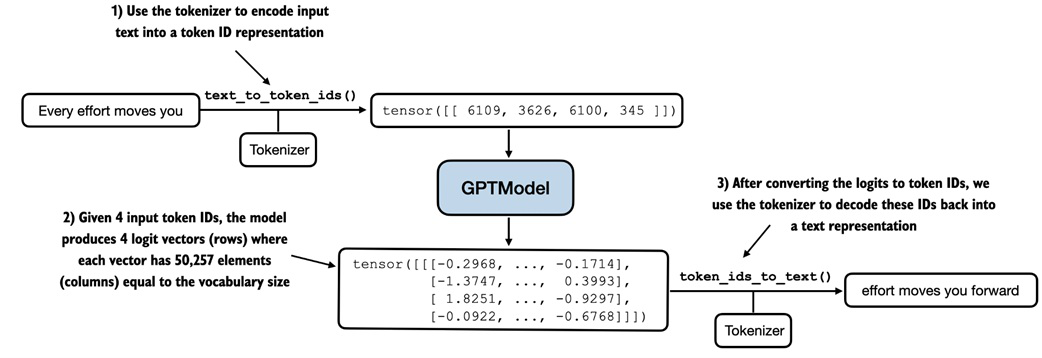
上图描绘了使用 GPT 模型进行文本生成的三步。

1. 首先，分词器将输入文本转换为一系列的 token ID。
2. 其次，模型接收这些 token ID，并生成相应的 logit，这些 logit 是向量，代表词汇表中每个令牌的概率分布。
3. 最后，这些 logit 被转换回 token ID，分词器将其解码为人类可读的文本，从而完成从文本输入到文本输出的循环。

同时，文章中也提到，模型现在还无法生成连贯的文本，因为它还未经过训练。本节将来讨论如何对模型进行预训练，从而让模型能够生成连贯的文本。

# 2. 文本生成质量评估
为了定义何为"连贯的"文本，我们需要实现一种数值化的方法来评估生成的内容。这种方法将使我们能够在整个训练过程中监控并提升模型的性能。

接下来的部分将介绍我们如何为生成的文本计算损失指标（loss metric）。这个损失会作为训练进度和效果的衡量标志。

## 2.1 示例数据
为了演示直观，我们定义两条非常简单的文本，后面会用这两条数据来探讨文本生成损失的计算过程。

In [1]:
input_texts = [
    "Every effort moves you",
    "I really like chocolate",
]

为了方便我们在文本和 token ID 之间进行转换，引入两个实用的函数text_to_token_ids 和 token_ids_to_text。并使用前面带你训练tokenizer一节中训练出的分词器来演示这两个函数的作用。

In [6]:
import torch
from transformers import AutoTokenizer


def text_to_token_ids(tokenizer, texts):
    encoded = [tokenizer.encode(text) for text in texts]
    return torch.tensor(encoded)


def token_ids_to_text(tokenizer, encoded):
    return tokenizer.batch_decode(encoded)


tokenizer_path = "./tokenizer/"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

input_ids = text_to_token_ids(tokenizer, input_texts)
input_ids

tensor([[   39,    88, 13757,    91,   223,    71,    72,    72, 15761,    86,
           223,    79,    81,    88, 23379,   223,    91,    81,    87],
        [   43,   223, 27224,    67,    78,    78,    91,   223, 23806,    77,
            71,   223, 28040,    81,    69,    81,    78, 18102,    71]])

In [7]:
token_ids_to_text(tokenizer, input_ids)

['Every effort moves you', 'I really like chocolate']